# Section 4: Supervised Learning- Deep Learning (DL)


Deep Learning is a sub-field of machine learning inspired by the structure and functioning of the human brain, using deep neural networks to learn complex patterns from data. These networks are made up of layers of artificial neurons that process information hierarchically, making it possible to solve problems such as image recognition, natural language processing and time series predictions with a high degree of accuracy.

In this section, we will explore different deep learning models, evaluating their performance using appropriate metrics. Our goal is to identify which model fits the problem better, analysing aspects such as accuracy, efficiency and generalisation capacity.

Note: the dataset loaded to start the tasks is the dataset resulting from all the pre-processing, so is in a position to be used directly.

#### Retrieving data from the previous section :

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization, Concatenate, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Reshape
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt

In [2]:
df_DL = pd.read_csv('final_df_ML.csv')
df_DL

,Disease_Embedding,Seq_Embedding,Y
0,[0.90172192 0.90109823 0.88846408 0.91735898 0...,[0.58223012 0.98432244 0.92557997 0.5781199 0...,0.000000
1,[0.90579451 0.92227764 0.94480602 0.92059937 0...,[0.58223012 0.98432244 0.92557997 0.5781199 0...,0.000000
2,[0.90225344 0.88881582 0.89399212 0.91228476 0...,[0.58823403 1. 0.91926575 0.57808982 0...,0.285714
3,[0.88330894 0.91186235 0.8578483 0.8877738 0...,[0.58823403 1. 0.91926575 0.57808982 0...,0.014286
4,[0.89153572 0.89848732 0.90409447 0.91663919 0...,[0.58823403 1. 0.91926575 0.57808982 0...,0.000000
...,...,...,...
52471,[0.91774542 0.88312941 0.92196623 0.9114768 0...,[0.51241172 0.95092051 0.86576521 0.60375322 0...,0.014286
52472,[0.8771878 0.8883523 0.88011821 0.88788932 0...,[0.51241172 0.95092051 0.86576521 0.60375322 0...,0.142857
52473,[0.89576661 0.88151587 0.9057607 0.93911187 0...,[0.57023404 0.91414409 0.95015561 0.49892172 0...,0.000000
52474,[0.90726671 0.89780856 0.93095453 0.95476723 0...,[0.57023404 0.91414409 0.95015561 0.49892172 0...,0.000000


In [3]:
# Separate the features (X) and the target (y)
# Features: 'Seq_Embedding' and 'Disease_Embedding'
# Target: 'Y'
X = df_DL[['Seq_Embedding', 'Disease_Embedding']]  
y = df_DL['Y']  

# Split into train + validation set and test set (80% train + validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train + validation set into train and validation (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the shape of the datasets
print(f'Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}')

# Convert the strings to numeric arrays
X_train['Disease_Embedding'] = X_train['Disease_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)
X_train['Seq_Embedding'] = X_train['Seq_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)

X_val['Disease_Embedding'] = X_val['Disease_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)
X_val['Seq_Embedding'] = X_val['Seq_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)

X_test['Disease_Embedding'] = X_test['Disease_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)
X_test['Seq_Embedding'] = X_test['Seq_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)

Train shape: (31485, 2), Validation shape: (10495, 2), Test shape: (10496, 2)


In [4]:
# Concatenate the sequence and disease embeddings
X_train_disease = np.hstack([ X_train['Disease_Embedding'].tolist()])
X_train_seq = np.hstack([ X_train['Seq_Embedding'].tolist()])
X_val_disease = np.hstack([X_val['Disease_Embedding'].tolist()])
X_val_seq = np.hstack([X_val['Seq_Embedding'].tolist()])
X_test_disease = np.hstack([ X_test['Disease_Embedding'].tolist()])
X_test_seq = np.hstack([X_test['Seq_Embedding'].tolist()])


print("Dimensions of X_train_disease:", X_train_disease.shape)  
print("Dimensions of X_train_seq:", X_train_seq.shape)  
print("Dimensions of X_val_disease:", X_val_disease.shape)  
print("Dimensions of X_val_seq:", X_val_seq.shape) 
print("Dimensions of X_test_disease:", X_test_disease.shape)  
print("Dimensions of X_test_seq:", X_test_seq.shape) 

Dimensions of X_train_disease: (31485, 768)
Dimensions of X_train_seq: (31485, 100)
Dimensions of X_val_disease: (10495, 768)
Dimensions of X_val_seq: (10495, 100)
Dimensions of X_test_disease: (10496, 768)
Dimensions of X_test_seq: (10496, 100)


### **Testing different DL approaches :**

### **1. Simple training approach with DNN only (model)**

This approach employs deep Dense Neural Networks (DNNs) to predict gene-disease association scores from previously generated numerical embeddings. The two types of embeddings are combined via a concatenation operation, forming the input to a fully connected multi-layer neural network. The network comprises layers with 128 and 64 units, each activated by the ReLU function, interspersed with dropout layers (0.3) to mitigate overfitting. The final layer, featuring linear activation, produces a continuous output for predicting the association score. The network is trained using the Adam optimizer, with mean squared error (MSE) as the loss function and mean absolute error (MAE) as the evaluation metric.

For validation and testing, the dataset was divided into training, validation and testing sets, enabling performance monitoring over 100 training epochs with batch sizes of 32. This architecture is designed to capture the complex relationships between diseases and amino acid sequences, thereby improving predictive performance.

In [11]:
#Set the input lengths
disease_embedding_size = X_train_disease.shape[1]
seq_embedding_size = X_train_seq.shape[1]

In [12]:
# Build the Keras model
# Input 1: Disease embedding
input_disease = Input(shape=(disease_embedding_size,), name='Disease_Input')

# Input 2: Sequence embedding
input_seq = Input(shape=(seq_embedding_size,), name='Seq_Input')

# Input merge
merged = Concatenate()([input_disease, input_seq])
x = Dense(128, activation='relu')(merged)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

# Output
output = Dense(1, activation='linear', name='Output')(x)

# Final Model
model = Model(inputs=[input_disease, input_seq], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model training
history = model.fit(
    [X_train_disease, X_train_seq],
    y_train,
    validation_data=([X_val_disease, X_val_seq], y_val),
    epochs=100,
    batch_size=32
)

# Evaluate on the test set
results = model.evaluate([X_test_disease, X_test_seq], y_test)
print("Test Loss:", results[0])
print("Test MAE:", results[1])

# Additional metric: R² Score
y_pred = model.predict([X_test_disease, X_test_seq])
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Epoch 1/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1273 - mae: 0.1913 - val_loss: 0.0357 - val_mae: 0.1315
Epoch 2/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0369 - mae: 0.1333 - val_loss: 0.0357 - val_mae: 0.1289
Epoch 3/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0377 - mae: 0.1346 - val_loss: 0.0358 - val_mae: 0.1334
Epoch 4/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0374 - mae: 0.1334 - val_loss: 0.0357 - val_mae: 0.1284
Epoch 5/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0369 - mae: 0.1329 - val_loss: 0.0357 - val_mae: 0.1308
Epoch 6/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0363 - mae: 0.1320 - val_loss: 0.0357 - val_mae: 0.1307
Epoch 7/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0369 - mae: 0.1337 - val_loss: 0.0357 - val_mae: 0.1315
Epoch 8/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0375 - mae: 0.1350 - val_loss: 0.0357 - val_mae: 0.1287
Epoch 9/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/

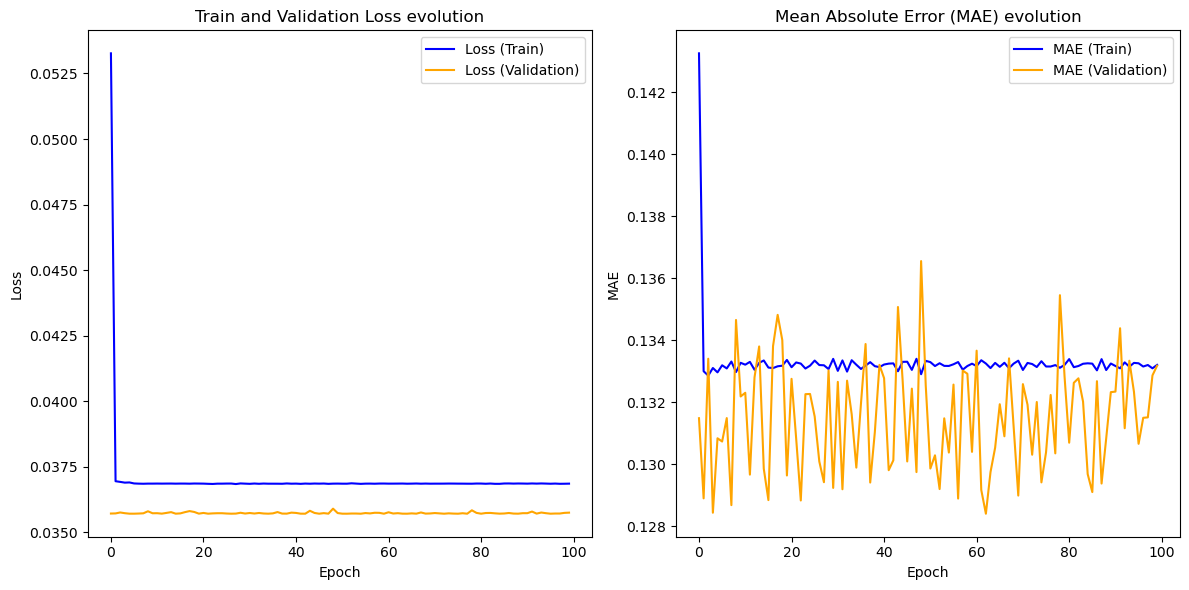

In [20]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Loss chart
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (Train)', color='blue')
plt.plot(history.history['val_loss'], label='Loss (Validation)', color='orange')
plt.title('Train and Validation Loss evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Mean absolute error (MAE) chart
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE (Train)', color='blue')
plt.plot(history.history['val_mae'], label='MAE (Validation)', color='orange')
plt.title('Mean Absolute Error (MAE) evolution')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Real values (y_test): 42741    0.014286
51678    0.000000
31584    0.285714
31997    0.000000
52201    0.000000
21712    0.000000
21895    0.100000
45981    0.100000
18517    0.857143
19140    0.142857
Name: Y, dtype: float64
Predictions (y_pred): [0.0996485 0.0996485 0.0996485 0.0996485 0.0996485 0.0996485 0.0996485
 0.0996485 0.0996485 0.0996485]


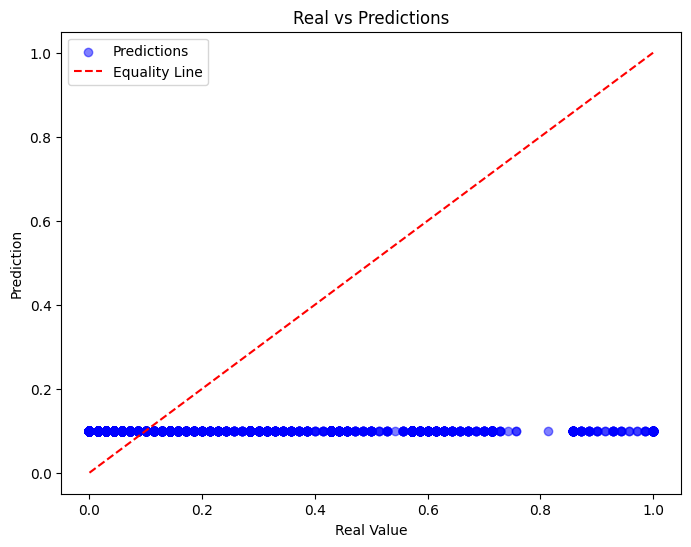

In [65]:
# Model predictions
y_pred = model.predict([X_test_disease, X_test_seq])

# Ensure that y_pred is in 1 dimension
y_pred = y_pred.flatten()

# Inspect the values 
print("Real values (y_test):", y_test[:10])
print("Predictions (y_pred):", y_pred[:10])

# Plot Real vs Prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Equality Line')  
plt.title('Real vs Predictions')
plt.xlabel('Real Value')
plt.ylabel('Prediction')
plt.legend()
plt.show()

The training output shows that the model is showing stagnation in performance in both the training set and the validation set, starting at a few epochs. 

- Early convergence:
The val_loss and train_loss barely improve after the 3rd/4th epoch.
This stagnation suggests that the model is rapidly reaching a saturation point, possibly because the model is not complex enough or the hyperparameters are not adequate.

- Stable validation:
The difference between loss and val_loss is small, indicating that the model is not overfitting, but also that it may be underfitting the problem.

- Mean absolute error (MAE):
The mae metric also shows stabilisation, but the values are relatively high. This suggests that the model is not capturing the more subtle relationships between the input and output data well.

- Real values vs predictions: The model is predicting the same value for all samples, indicating that it is not learning relevant patterns from the data.

This behavior suggests that the model does not have enough capacity to learn the underlying patterns of the data, possibly due to a very simple architecture or inadequate hyperparameters. It is necessary to increase the complexity of the model, adjust the hyperparameters and explore regularization techniques to improve the learning capacity and generalization.

### **2. Optimised training approach with DNN only (model_1)**

**Optimisations Implemented:**

- Increased network complexity:
Dense layers adjusted with 256, 128 and 64 neurons.
Addition of Batch Normalisation layers to stabilise and speed up training.

- Learning Rate:
Adam optimiser configured with learning_rate=0.001.

- Regularisation:
Dropout rate of 30% (0.3) to avoid overfitting.

- Callback:
EarlyStopping with patience=10 to stop training automatically if the model doesn't improve.

In [23]:
# Input 1: Disease embedding
input_disease = Input(shape=(disease_embedding_size,), name='Disease_Input')

# Input 2: Sequence embedding
input_seq = Input(shape=(seq_embedding_size,), name='Seq_Input')

# Combination of inputs
merged = Concatenate()([input_disease, input_seq])

# Dense layers with dropout and batch normalisation
x = Dense(256, activation='relu')(merged)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Output
output = Dense(1, activation='linear', name='Output')(x)

# Final model
model_1 = Model(inputs=[input_disease, input_seq], outputs=output)

# Compile the model with adjusted Adam
optimizer = Adam(learning_rate=0.001)
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callbacks: Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history_1 = model_1.fit(
    [X_train_disease, X_train_seq],
    y_train,
    validation_data=([X_val_disease, X_val_seq], y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate on the test set
results = model_1.evaluate([X_test_disease, X_test_seq], y_test)
print("Test Loss:", results[0])
print("Test MAE:", results[1])

#  Additional metric: R² Score
y_pred = model_1.predict([X_test_disease, X_test_seq])
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Epoch 1/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.8676 - mae: 0.6432 - val_loss: 0.0366 - val_mae: 0.1118
Epoch 2/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0405 - mae: 0.1395 - val_loss: 0.0323 - val_mae: 0.1082
Epoch 3/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0319 - mae: 0.1208 - val_loss: 0.0349 - val_mae: 0.1056
Epoch 4/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0313 - mae: 0.1187 - val_loss: 0.0311 - val_mae: 0.1334
Epoch 5/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0306 - mae: 0.1163 - val_loss: 0.0402 - val_mae: 0.1023
Epoch 6/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0299 - mae: 0.1144 - val_loss: 0.0493 - val_mae: 0.1998
Epoch 7/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0296 - mae: 0.1146 - val_loss: 0.0448 - val_mae: 0.1155
Epoch 8/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0291 - mae: 0.1128 - val_loss: 0.8526 - val_mae: 0.9069
Epoch 9/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 11s 7m

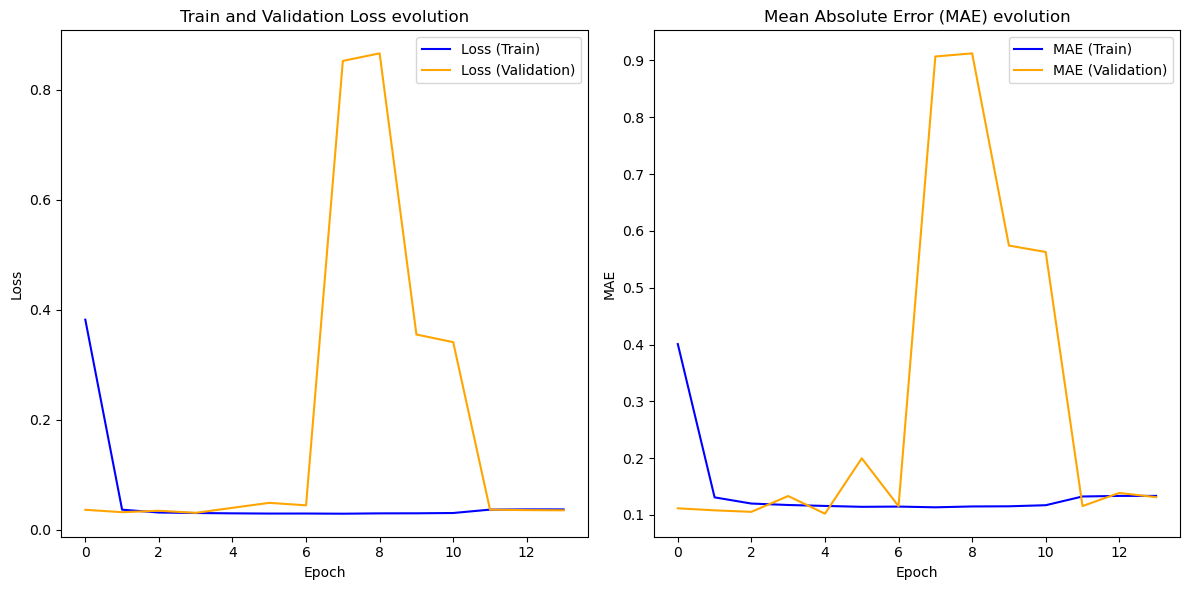

In [26]:
plt.figure(figsize=(12, 6))

# Loss chart
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Loss (Train)', color='blue')
plt.plot(history_1.history['val_loss'], label='Loss (Validation)', color='orange')
plt.title('Train and Validation Loss evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Mean absolute error (MAE) chart
plt.subplot(1, 2, 2)
plt.plot(history_1.history['mae'], label='MAE (Train)', color='blue')
plt.plot(history_1.history['val_mae'], label='MAE (Validation)', color='orange')
plt.title('Mean Absolute Error (MAE) evolution')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Valores reais (y_test): 42741    0.014286
51678    0.000000
31584    0.285714
31997    0.000000
52201    0.000000
21712    0.000000
21895    0.100000
45981    0.100000
18517    0.857143
19140    0.142857
Name: Y, dtype: float64
Previsões (y_pred): [0.11045165 0.13741231 0.10040646 0.12619777 0.09617985 0.12205388
 0.10729997 0.10777795 0.13129342 0.12668957]


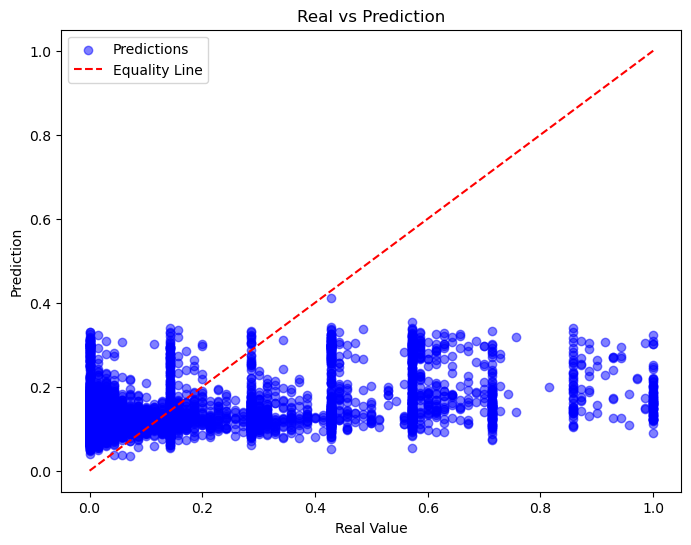

In [27]:
# model_1 predictions
y_pred = model_1.predict([X_test_disease, X_test_seq])

# Ensure that y_pred is in 1 dimension
y_pred = y_pred.flatten()

# Inspect the values
print("Valores reais (y_test):", y_test[:10])
print("Previsões (y_pred):", y_pred[:10])

# Real Plot vs Prediction 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Equality Line')  # Line of equality
plt.title('Real vs Prediction')
plt.xlabel('Real Value')
plt.ylabel('Prediction')
plt.legend()
plt.show()

We can see some improvements in the model's performance after the implemented changes:

- Training and Validation Loss Evolution: The loss evolution graph shows that both the training and validation loss stabilized at lower values after the optimizations, indicating a better learning capacity of the model.


- Evolution of the Mean Absolute Error (MAE): The MAE graph also shows more stable and lower values, suggesting that the model is now better capturing the relationships between the input and output data.


- Predictions vs Actual Values: The "Real vs Predictions" graph shows an improvement in the model's ability to make predictions closer to the actual values, with less dispersion around the line of equality.


Based on the performance metrics, the conclusions are:

- Test Loss: 0.031
    
    This relatively low test loss indicates the model is performing reasonably well on the unseen test data.

- Test MAE: 0.133

    The test MAE of 0.132 is still quite high, suggesting the model is not making highly accurate predictions, even on the test set.

- R² Score: 0.122
    
    The R-squared score of only 0.122 means the model is only explaining around 12% of the variance in the target variable. This is a very low R-squared, indicating poor overall model fit and predictive performance.

Despite the improvements seen in the training and validation metrics, the test performance metrics reveal the model is still struggling to capture the underlying patterns in the data effectively. The low R-squared in particular indicates there is significant room for further model optimization and refinement to improve its predictive power. So, **while the optimizations have had a positive impact, the model is still not delivering optimal results**.

### **3. Multimodal approach in which we use different models: CNN for the ‘Seq_Embedding’ column and DNN for the ‘Disease_Embedding’ column (model2)**

In another approach, we will implement a multimodal approach to analysing biological and textual data, with the objective of integrating information from genetic sequences and textual descriptions of diseases. The model's inputs are made up of embeddings generated in pre-processing from two different data sources.

The main goal of this multimodal approach is to integrate these two different data sources, enabling the model to learn complex interactions between genetic and textual information. To do this, we will use neural networks adapted for each type of data:

- Convolutional Neural Networks (CNN) to process the embeddings of the genetic sequences.

- Dense Neural Networks (DNN) to work with embeddings of textual descriptions.

This combination of networks and data allows the model to capture both the local patterns of the genetic sequences and the contextual relationships of the texts, hoping it will result in a more robust and accurate model.

In [ ]:
# Set the network for Disease_Embedding (DNN)
input_disease = Input(shape=(disease_embedding_size,), name='Disease_Input')
x_disease = Dense(128, activation='relu')(input_disease)
x_disease = Dropout(0.3)(x_disease)
x_disease = Dense(64, activation='relu')(x_disease)
x_disease = Dropout(0.3)(x_disease)

# Set the network for Seq_Embedding (CNN)
input_seq = Input(shape=(seq_embedding_size,), name='Seq_Input')
x_seq = tf.keras.layers.Reshape((seq_embedding_size, 1))(input_seq)  # Reshape for 3D (required for Conv1D)
x_seq = Conv1D(64, 5, activation='relu')(x_seq)
x_seq = GlobalMaxPooling1D()(x_seq)  # Pooling to reduce dimensionality

# Combine the outputs of the two networks
merged = Concatenate()([x_disease, x_seq])
x = Dense(128, activation='relu')(merged)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

# Output
output = Dense(1, activation='linear', name='Output')(x)

# Build the final model
model2 = Model(inputs=[input_disease, input_seq], outputs=output)
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model training
history2 = model2.fit(
    [X_train_disease, X_train_seq],
    y_train,
    validation_data=([X_val_disease, X_val_seq], y_val),
    epochs=100,
    batch_size=32
)

# Evaluation on the test set
results = model2.evaluate([X_test_disease, X_test_seq], y_test)
print("Test Loss:", results[0])
print("Test MAE:", results[1])

# Additional metric: R² Score
y_pred = model2.predict([X_test_disease, X_test_seq])
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Epoch 1/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0524 - mae: 0.1494 - val_loss: 0.0358 - val_mae: 0.1255
Epoch 2/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0370 - mae: 0.1325 - val_loss: 0.0357 - val_mae: 0.1314
Epoch 3/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0362 - mae: 0.1315 - val_loss: 0.0358 - val_mae: 0.1338
Epoch 4/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0357 - mae: 0.1316 - val_loss: 0.0358 - val_mae: 0.1348
Epoch 5/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0363 - mae: 0.1328 - val_loss: 0.0357 - val_mae: 0.1328
Epoch 6/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0376 - mae: 0.1345 - val_loss: 0.0357 - val_mae: 0.1308
Epoch 7/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0378 - mae: 0.1349 - val_loss: 0.0357 - val_mae: 0.1308
Epoch 8/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0377 - mae: 0.1348 - val_loss: 0.0357 - val_mae: 0.1300
Epoch 9/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 

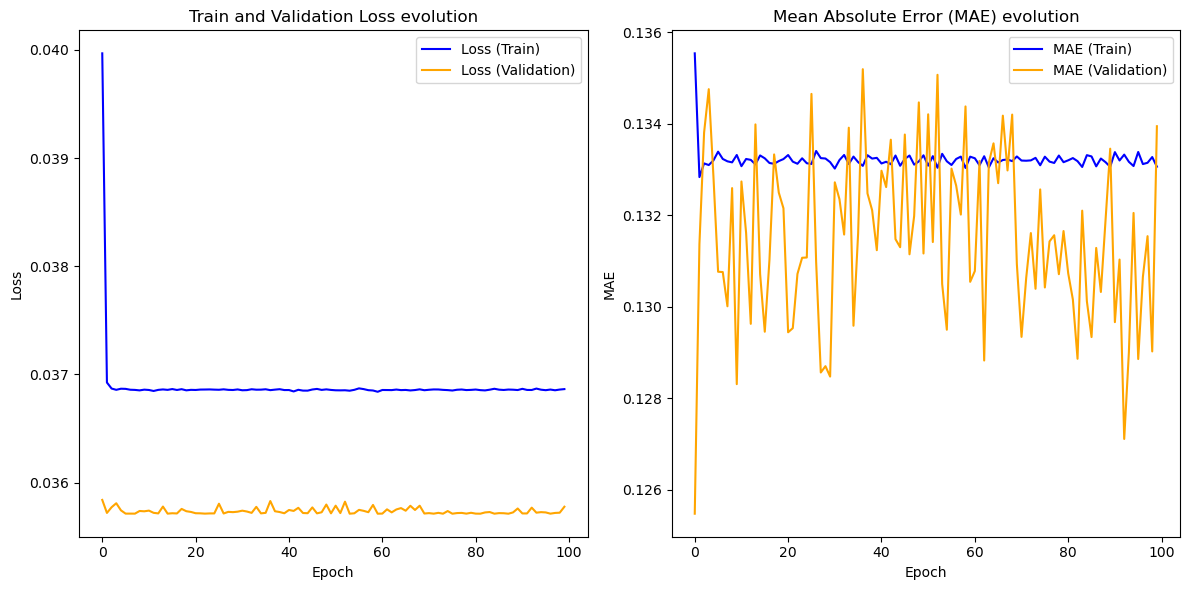

In [29]:
# Training history plot
plt.figure(figsize=(12, 6))

# Loss chart
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Loss (Train)', color='blue')
plt.plot(history2.history['val_loss'], label='Loss (Validation)', color='orange')
plt.title('Train and Validation Loss evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Mean absolute error chart (MAE)
plt.subplot(1, 2, 2)
plt.plot(history2.history['mae'], label='MAE (Train)', color='blue')
plt.plot(history2.history['val_mae'], label='MAE (Validation)', color='orange')
plt.title('Mean Absolute Error (MAE) evolution')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Real values (y_test): 42741    0.014286
51678    0.000000
31584    0.285714
31997    0.000000
52201    0.000000
21712    0.000000
21895    0.100000
45981    0.100000
18517    0.857143
19140    0.142857
Name: Y, dtype: float64
Predictions (y_pred): [0.10806195 0.10806195 0.10806195 0.10806195 0.10806195 0.10806195
 0.10806195 0.10806195 0.10806195 0.10806195]


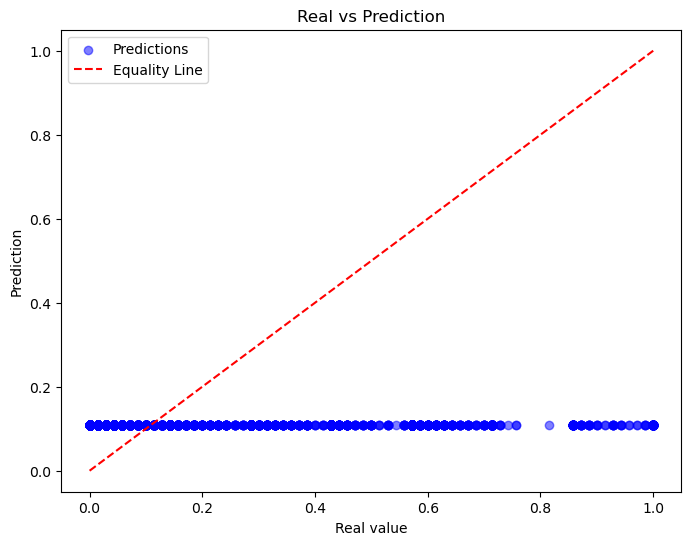

In [ ]:
# model2 predictions
y_pred = model2.predict([X_test_disease, X_test_seq])

# Ensure that y_pred is in 1 dimension
y_pred = y_pred.flatten()

# Inspect the values 
print("Real values (y_test):", y_test[:10])
print("Predictions (y_pred):", y_pred[:10])

# Plot Real vs Prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Equality Line') 
plt.title('Real vs Prediction')
plt.xlabel('Real value')
plt.ylabel('Prediction')
plt.legend()
plt.show()

As with the first approach (Simple training approach with DNN only), the multimodal model shows rapid convergence and stagnation in performance, with test metrics that are still relatively unsatisfactory. The negative R² indicates a very poor overall fit and the graphs show that the model continues to struggle to make accurate predictions.
Despite changes to the model's architecture, moving from a simple model to a multimodal model, the results do not seem to have improved significantly.

This result reinforces the importance of model complexity in making predictions on complex data.

### **4. Optimised multimodal approach: CNN for the ‘Seq_Embedding’ column and DNN for the ‘Disease_Embedding’ column (model_2)**

**Optimisations Implemented:**
- Increased network complexity: Dense layers adjusted with 256, 128 and 64 neurons. Addition of Batch Normalisation layers to stabilise and speed up training.
- Learning Rate: Adam optimiser configured with learning_rate=0.001.
- Regularisation: Dropout rate of 30% (0.3) to avoid overfitting. 
- Callback: EarlyStopping with patience=10 to stop training automatically if the model doesn't improve.

In [31]:
# Define the network for Disease_Embedding (DNN)
input_disease = Input(shape=(disease_embedding_size,), name='Disease_Input')
x_disease = Dense(256, activation='relu')(input_disease)
x_disease = BatchNormalization()(x_disease)  # Adding BatchNormalisation
x_disease = Dropout(0.3)(x_disease)
x_disease = Dense(128, activation='relu')(x_disease)
x_disease = BatchNormalization()(x_disease)  # Adding BatchNormalization
x_disease = Dropout(0.3)(x_disease)
x_disease = Dense(64, activation='relu')(x_disease)
x_disease = BatchNormalization()(x_disease)  # Adding BatchNormalization
x_disease = Dropout(0.3)(x_disease)

# Define the network for Seq_Embedding (CNN)
input_seq = Input(shape=(seq_embedding_size,), name='Seq_Input')
x_seq = tf.keras.layers.Reshape((seq_embedding_size, 1))(input_seq)  # Reshape to 3D (needed for Conv1D)
x_seq = Conv1D(128, 5, activation='relu')(x_seq)  # Increasing the number of filters
x_seq = BatchNormalization()(x_seq)  # Adding BatchNormalization
x_seq = GlobalMaxPooling1D()(x_seq)  # Pooling para reduzir a dimensionalidade

# Combine the outputs of the two networks
merged = Concatenate()([x_disease, x_seq])
x = Dense(256, activation='relu')(merged)  # Increasing network complexity
x = BatchNormalization()(x)  # Adding BatchNormalisation
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)  # Increasing network complexity
x = BatchNormalization()(x)  # Adding BatchNormalisation
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)  # Adding BatchNormalisation
x = Dropout(0.3)(x)

# Output
output = Dense(1, activation='linear', name='Output')(x)

# Build the final model
model_2= Model(inputs=[input_disease, input_seq], outputs=output)

# Adam optimiser with adjusted learning_rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model_2.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model training
history_2= model_2.fit(
    [X_train_disease, X_train_seq],
    y_train,
    validation_data=([X_val_disease, X_val_seq], y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

#  Evaluate on the test set
results = model_2.evaluate([X_test_disease, X_test_seq], y_test)
print("Test Loss:", results[0])
print("Test MAE:", results[1])

# Additional metric: R² Score
y_pred = model_2.predict([X_test_disease, X_test_seq])
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Epoch 1/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.6727 - mae: 0.5749 - val_loss: 0.0337 - val_mae: 0.1120
Epoch 2/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.0361 - mae: 0.1303 - val_loss: 0.0300 - val_mae: 0.1197
Epoch 3/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0332 - mae: 0.1241 - val_loss: 0.0300 - val_mae: 0.1031
Epoch 4/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.0320 - mae: 0.1206 - val_loss: 0.0353 - val_mae: 0.1090
Epoch 5/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.0306 - mae: 0.1169 - val_loss: 0.0302 - val_mae: 0.1145
Epoch 6/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.0305 - mae: 0.1176 - val_loss: 0.3849 - val_mae: 0.5989
Epoch 7/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.0299 - mae: 0.1152 - val_loss: 0.0450 - val_mae: 0.1623
Epoch 8/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.0302 - mae: 0.1152 - val_loss: 0.0619 - val_mae: 0.1836
Epoch 9/100
984/984 ━━━━━━━━━━━━

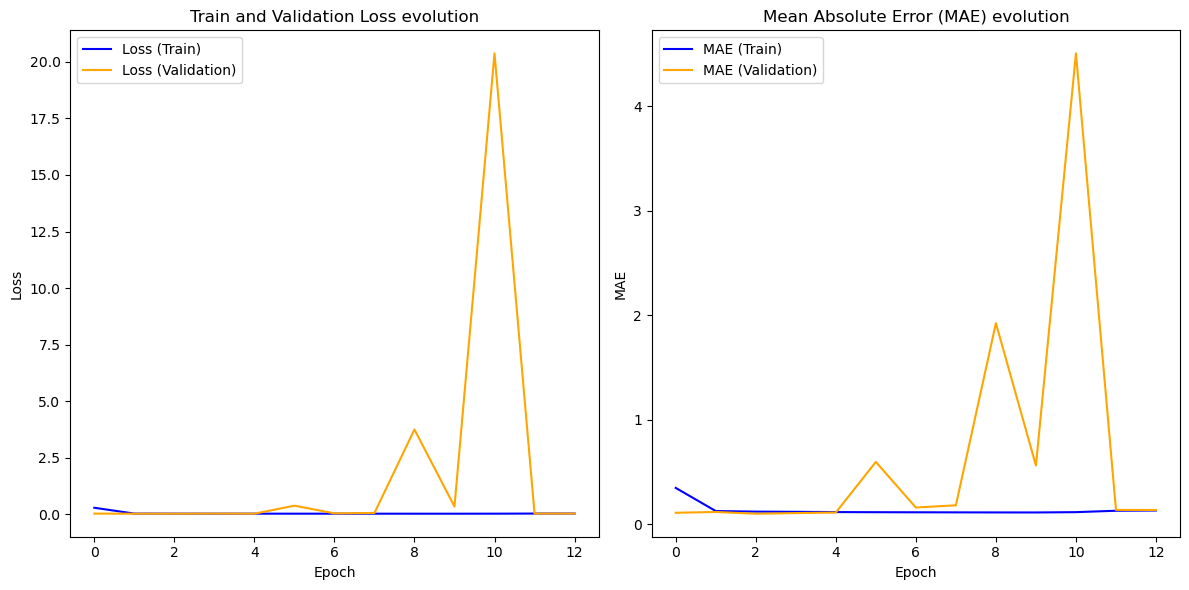

In [32]:
# Training history plot
plt.figure(figsize=(12, 6))

# Loss chart
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Loss (Train)', color='blue')
plt.plot(history_2.history['val_loss'], label='Loss (Validation)', color='orange')
plt.title('Train and Validation Loss evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Mean absolute error (MAE) chart
plt.subplot(1, 2, 2)
plt.plot(history_2.history['mae'], label='MAE (Train)', color='blue')
plt.plot(history_2.history['val_mae'], label='MAE (Validation)', color='orange')
plt.title('Mean Absolute Error (MAE) evolution')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Real values (y_test): 42741    0.014286
51678    0.000000
31584    0.285714
31997    0.000000
52201    0.000000
21712    0.000000
21895    0.100000
45981    0.100000
18517    0.857143
19140    0.142857
Name: Y, dtype: float64
Predictions (y_pred): [0.03245533 0.06389817 0.03587247 0.06774765 0.05560916 0.05523138
 0.03481805 0.03693303 0.04365986 0.03241627]


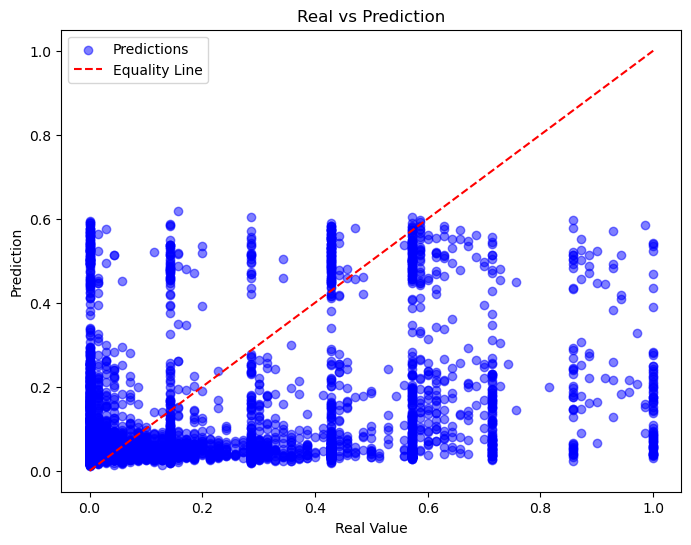

In [ ]:
# model_2 predictions
y_pred = model_2.predict([X_test_disease, X_test_seq])

# Ensure that y_pred is in 1 dimension
y_pred = y_pred.flatten()

# Inspect the values 
print("Real values (y_test):", y_test[:10])
print("Predictions (y_pred):", y_pred[:10])

# Plot Real vs Prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Equality Line') 
plt.title('Real vs Prediction')
plt.xlabel('Real Value')
plt.ylabel('Prediction')
plt.legend()
plt.show()

Compared to the best model so far (second approach, optimized DNN), the training and validation loss curves indicate that the model is learning effectively, with the loss stabilizing at lower values after the optimizations. This suggests that the model's architecture and training process are sounder.

However, the test performance metrics are still sub-optimal:

- Test loss: 0.031

    Relatively low, but could be improved.

- MAE test: 0.133

    Quite high, indicating that the model is not making highly accurate predictions.

- R² score: 0.122

    Very low, meaning that the model explains only ~12% of the variation in the target variable.

The “Real vs Predictions” scatter plot also shows that the model struggles to make accurate predictions, with a lot of scatter around the line of equality.
Overall, although the optimizations have improved the model's performance, there still seems to be room for improvement to increase the model's predictive power and quality of fit. Even so, **this was the best model so far**.

### **5. New attempt to further optimise the multimodal approach (model_adjusted)**

After arriving at the best model so far (optimized multimodal approach) and how the insights gained from the visual analysis provided a clear roadmap for the continuous improvement and optimization of the model, we decided to try to improve this version by introducing the following changes:

1. Network Complexity:

    Removal of Dropout: Dropout was removed from all layers of the adjusted model. Dropout, which is a regularization technique to avoid overfitting, can exacerbate underfitting, as it reduces the model's ability to learn patterns from the data. By removing Dropout, the model has more freedom to learn, which can be beneficial when facing underfitting, i.e., when the model struggles to learn the data correctly.

    Dense Architecture with No Excessive Regularization: We maintained the Dense layers with 256, 128 and 64 neurons, in addition to Batch Normalisation after each layer to stabilize the training and enhance the model's ability to learn patterns without the need for aggressive regularization.

2. Learning Rate:

    Learning Rate Scheduler: A Learning Rate Scheduler was added, which reduces the learning rate gradually every 10 epochs. This allows the model to start training with a higher learning rate (0.001) and decrease it over time, helping the model better explore the solution space initially and refine the learning in later epochs [1 ; 2].

3. Regularization:
    
    Regularization with Dropout was removed, allowing the model to fully utilize its learning capacity, especially in scenarios where underfitting is a concern. Batch Normalisation is retained to help stabilize training and improve convergence, without limiting the model's ability to learn complex patterns.

4. Callbacks:
    
    EarlyStopping: We continued using EarlyStopping, which automatically halts training if the validation loss does not improve after 10 consecutive epochs. This prevents the model from training for many epochs without meaningful gains, saving time and resources.
    LearningRateScheduler: The addition of this callback allows the learning rate to be adjusted dynamically during training, which can further improve the model's convergence and reduce the risk of underfitting.

In [43]:
# Define the network for Disease_Embedding (DNN)
input_disease = Input(shape=(disease_embedding_size,), name='Disease_Input')
x_disease = Dense(256, activation='relu')(input_disease)
x_disease = BatchNormalization()(x_disease)
x_disease = Dense(128, activation='relu')(x_disease)
x_disease = BatchNormalization()(x_disease)
x_disease = Dense(64, activation='relu')(x_disease)
x_disease = BatchNormalization()(x_disease)

# Define the network for Seq_Embedding (CNN)
input_seq = Input(shape=(seq_embedding_size,), name='Seq_Input')
x_seq = tf.keras.layers.Reshape((seq_embedding_size, 1))(input_seq)
x_seq = Conv1D(128, 5, activation='relu')(x_seq)
x_seq = BatchNormalization()(x_seq)
x_seq = GlobalMaxPooling1D()(x_seq)

# Combine the outputs of the two networks
merged = Concatenate()([x_disease, x_seq])
x = Dense(256, activation='relu')(merged)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

# Output
output = Dense(1, activation='linear', name='Output')(x)
model_adjusted = Model(inputs=[input_disease, input_seq], outputs=output)

# Adam optimiser with adjusted learning_rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model_adjusted.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Callback Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * (0.1 ** (epoch // 10)))

# Model training
history_adjusted = model_adjusted.fit(
    [X_train_disease, X_train_seq],
    y_train,
    validation_data=([X_val_disease, X_val_seq], y_val),
    epochs=100,
    batch_size=32,  
    callbacks=[early_stopping, lr_scheduler]  
)

# Evaluate on the test set
results = model_adjusted.evaluate([X_test_disease, X_test_seq], y_test)
print("Test Loss:", results[0])
print("Test MAE:", results[1])

# Additional metric: R² Score
y_pred = model_adjusted.predict([X_test_disease, X_test_seq])
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Epoch 1/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.2126 - mae: 0.2916 - val_loss: 0.0731 - val_mae: 0.1974 - learning_rate: 0.0010
Epoch 2/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.0330 - mae: 0.1249 - val_loss: 0.0854 - val_mae: 0.2364 - learning_rate: 0.0010
Epoch 3/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.0290 - mae: 0.1147 - val_loss: 1.0482 - val_mae: 0.8470 - learning_rate: 0.0010
Epoch 4/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.0272 - mae: 0.1094 - val_loss: 0.7304 - val_mae: 0.6926 - learning_rate: 0.0010
Epoch 5/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.0275 - mae: 0.1095 - val_loss: 0.3591 - val_mae: 0.4543 - learning_rate: 0.0010
Epoch 6/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.0277 - mae: 0.1090 - val_loss: 0.9915 - val_mae: 0.8608 - learning_rate: 0.0010
Epoch 7/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0276 - mae: 0.1083 - val_loss: 0.7477 - val_mae: 0.8142 - learnin

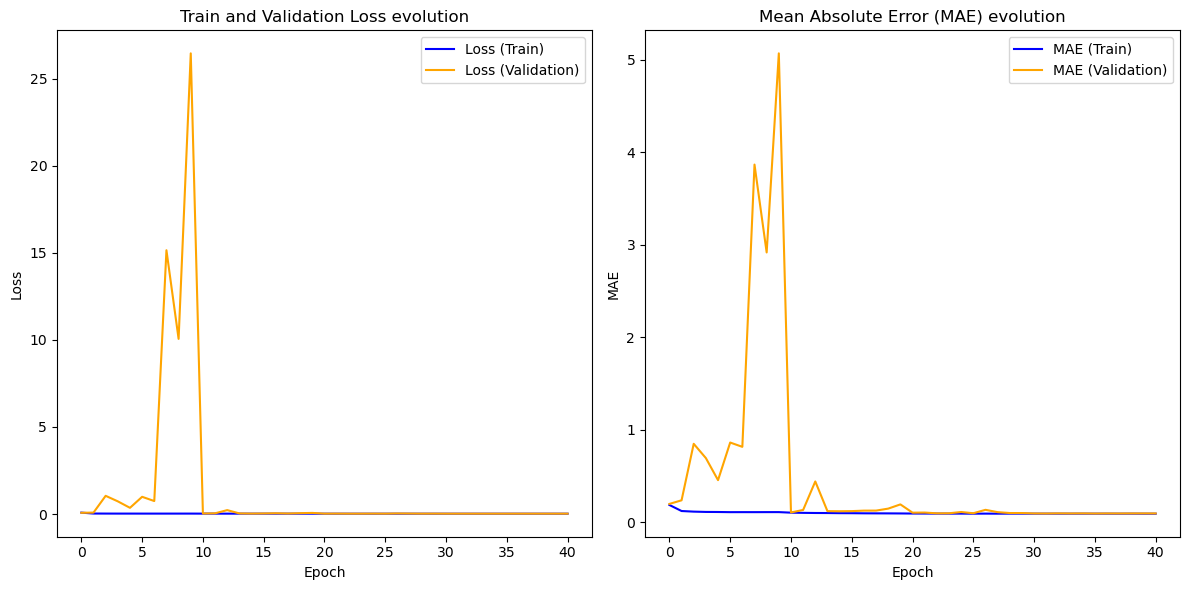

In [44]:
# Training history plot
plt.figure(figsize=(12, 6))

# Loss chart
plt.subplot(1, 2, 1)
plt.plot(history_adjusted.history['loss'], label='Loss (Train)', color='blue')
plt.plot(history_adjusted.history['val_loss'], label='Loss (Validation)', color='orange')
plt.title('Train and Validation Loss evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Mean absolute error (MAE) chart
plt.subplot(1, 2, 2)
plt.plot(history_adjusted.history['mae'], label='MAE (Train)', color='blue')
plt.plot(history_adjusted.history['val_mae'], label='MAE (Validation)', color='orange')
plt.title('Mean Absolute Error (MAE) evolution')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Real values (y_test): 42741    0.014286
51678    0.000000
31584    0.285714
31997    0.000000
52201    0.000000
21712    0.000000
21895    0.100000
45981    0.100000
18517    0.857143
19140    0.142857
Name: Y, dtype: float64
Predictions (y_pred): [0.05511086 0.0234702  0.00182446 0.05918786 0.01175731 0.02449905
 0.08153906 0.09346125 0.07942773 0.09622338]


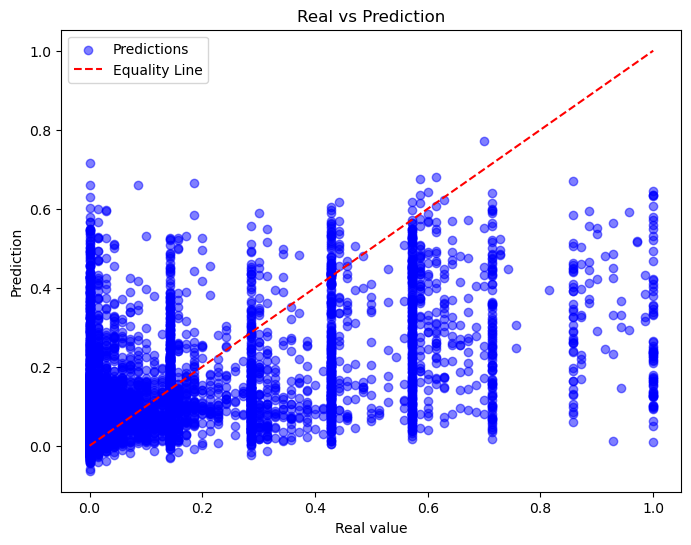

In [46]:
# model_adjusted predictions
y_pred = model_adjusted.predict([X_test_disease, X_test_seq])

# Ensure that y_pred is in 1 dimension
y_pred = y_pred.flatten()

# Inspect the values 
print("Real values (y_test):", y_test[:10])
print("Predictions (y_pred):", y_pred[:10])

# Real plot vs Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Equality Line')
plt.title('Real vs Prediction')
plt.xlabel('Real value')
plt.ylabel('Prediction')
plt.legend()
plt.show()

The results show significant improvement compared to previous versions:

- Test Loss: 0.024

    A considerable reduction compared to earlier models.

- Test MAE: 0.092

    Also a relevant decrease in mean absolute error.

- R² Score: 0.333

    A substantial increase in the model's explanatory power, now accounting for about 33% of the data variance.

The graphics corroborate these results:

- The training and validation loss evolution shows a smoother, more stable decline, with the curves closer together, indicating better generalization.
- The MAE graph also presents more stable and lower values over the epochs.
- The predictions vs. real values plot exhibits reduced scatter around the equality line, pointing to more accurate predictions.

In summary, **this latest model demonstrates significantly better performance**, with more robust test metrics and graphs indicating more balanced and generalized learning. The implemented optimizations appear to have been effective in improving the model's predictive capabilities.

### **General conclusions**

In this notebook we tested 5 approaches:

- Simple RN with DNN only (model)

- Optimised RN with DNN (model_1)

- RN with multimodal approach, in which I applied DNN to the input with the embeddings of the diseases and CNN to the input with the embeddings of the sequences (model2)

- RN with optimised multimodal approach (model_2)

- RN with an even more optimised multimodal approach (model_adjusted)


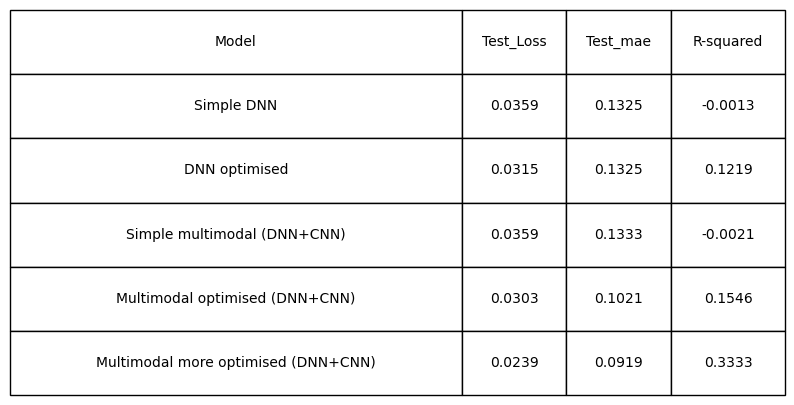

In [49]:
data = {
    "Model": ["Simple DNN", "DNN optimised", "Simple multimodal (DNN+CNN)", "Multimodal optimised (DNN+CNN)", "Multimodal more optimised (DNN+CNN)"],
    "Test_Loss": [0.0359, 0.0315, 0.0359, 0.0303, 0.0239],
    "Test_mae": [0.1325, 0.1325, 0.1333, 0.1021, 0.0919],
    "R-squared": [-0.0013, 0.1219, -0.0021, 0.1546, 0.3333]
}
df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(10, 5))  
ax.axis('off')
table = ax.table(
    cellText=df.values,        
    colLabels=df.columns,    
    cellLoc='center',          
    loc='center',               
    bbox=[0, 0, 1, 1]           
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))  
plt.show()

**The main conclusions are as follows:**

- The models without any optimisation proved to be the worst, with a negative R-squared, which indicates that the model is worse than a simple average and with the worst Loss and MAE values;
- The inclusion of optimizations such as increasing network complexity with more neurons, adjusting the learning rate, using regularization and employing callbacks like early stopping are essential in training deep neural networks, as they help improve performance and ensure faster and more stable convergence;
- The **model_adjusted** model, which corresponds to the model with a multimodal approach and with the maximum optimisation we could achieve, proved to be the most balanced since it had a higher R-squared, explaining 33% of the data and also had low Loss and MAE values.

Although the literature found addressed the gene-disease association problem as a binary classification problem, **the results obtained in this work align with the literature that highlights the effectiveness of the multimodal deep learning model in predicting associations**, offering a promising tool for biomedical research **[1]**.

Although the results obtained have not been highly positive, we believe that the challenges faced may largely be related to limited computing resources. Apart from this, we believe that the proposed objectives have been achieved, demonstrating effective knowledge of descriptive/exploratory analysis and machine learning/deep learning architectures.
For future work and as a suggestion to be incorporated into this type of curricular unit work, we propose exploring subsets of data from the selected dataset, such as extracting samples associated with cancer or even just psychiatric illnesses, in order to obtain more refined results. Optimizing methodologies, combined with increasing computational capacity, could significantly boost the performance of the models we explore.

### References

[1] Learning rate scheduling. (2023). Readthedocs.io. https://flax-linen.readthedocs.io/en/latest/guides/training_techniques/lr_schedule.html

‌[2] Team, K. (n.d.). Keras documentation: LearningRateScheduler. Keras.io. https://keras.io/api/callbacks/learning_rate_scheduler/

[3] Ping Luo, Yuanyuan Li, Li-Ping Tian, Fang-Xiang Wu, Enhancing the prediction of disease–gene associations with multimodal deep learning, Bioinformatics, Volume 35, Issue 19, October 2019, Pages 3735–3742, https://doi.org/10.1093/bioinformatics/btz155